### $\alpha=1/2$ is problematic

In [2]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt


In [3]:
alphap = 0.5
probp = 0.75
expon = 2 * alphap - 1
print("expon ", expon)

expon  0.0


### Exponent $0$ means
$x^0 = 1$ always

In [4]:
def betadist(alpha):
    """gives a random number from beta distribution"""
    return random.betavariate(alpha,alpha)

In [7]:
betadist(0.5)

0.3941847505560931

In [8]:
def decision(probability):
    """
    decides with a given probability whether to keep the right part
    """
    if float(probability) > random.random():
        return True
    else: 
        return False

In [9]:
def splitting(segment):
    """
    splits a given segment. left and right are endpoints of the segment
    returns : 
        xL -> length of the left segment
        xR -> length of the right segment
        flag -> keeping the right segment
        xLp, xRp -> probability(unnormalized) for being selected
        change -> change of normalization const
    """
    xL = segment * betadist(alphap)
    xR = segment - xL
    flag = decision(probp)
    xLp = xL**expon
    xRp = xR**expon
    change = xLp + xRp - segment**expon
#     if change >= 0.99:
#         print(change)
    return xL, xR, flag, xLp, xRp, change


In [10]:
def pickindex(frag_prob, frag_prob_sum):
    """
    picks up a segment to be subsequently split
    """
    r = random.uniform(0, 1)
    sum_ = 0
    for index in range(len(frag_prob)):
        sum_ += frag_prob[index]/frag_prob_sum
        if sum_ < r:
            continue
        else:
            return index
        

In [11]:
def number_length(segment_lengths,flags):
    
    N = 0
    M = 0

    for i in range(len(flags)):
        if flags[i]:
            N += 1
            M += segment_lengths[i]
            pass
        pass
    return N, M

In [12]:
def realization_value(total_iteration, min_iteration, iteration_step):
    
    lengths = [1.]
    flags = [True]
    frag_prob = [1.] # raw probability, not normalized
    frag_prob_sum = 1.0 # normalization const

    iteration_list = list(range(min_iteration, total_iteration + 1, iteration_step))
    N_realization = []
    M_realization = []
    
    for i in range(total_iteration + 1):
        
        index = pickindex(frag_prob, frag_prob_sum)
        
        if flags[index] == True:

            xL, xR, flag, xLp, xRp, change = splitting(lengths[index])
            
            lengths[index] = xL
            lengths.append(xR)
            flags.append(flag)
            frag_prob[index] = xLp 
            frag_prob.append(xRp)
            frag_prob_sum += change
#             print(frag_prob)
#             print(frag_prob_sum)
#             print(np.sum(frag_prob))
            pass
            
        if i+1 in iteration_list:
            N, M = number_length(lengths,flags)
            N_realization.append(N)
            M_realization.append(M)
        pass 
    
    N_list = np.array(N_realization)
    M_list = np.array(M_realization)
    
    return N_list, M_list

In [13]:
%timeit realization_value(1_000, 1_00, 1_0)

41.2 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
def ensemble_average(total_iteration, min_iteration, iteration_step, ensemble_size):

    data_points = int ((total_iteration - min_iteration)/iteration_step + 1)
    N_ensemble = np.zeros(data_points)
    M_ensemble = np.zeros(data_points)
    step = ensemble_size // 100
    for i in range(ensemble_size):
        if i % step == 0:
            print("working with realization ",i)
        N_list, M_list = realization_value(total_iteration, min_iteration, iteration_step)
        N_ensemble += N_list
        M_ensemble += M_list
        pass
    
    N_average = N_ensemble/ensemble_size
    M_average = M_ensemble/ensemble_size
    
    return N_average, M_average

In [17]:
n = 10_000
a = n // 2
b = a // 10
N_average, M_average = ensemble_average(n, a, b, 1_000)

working with realization  0
working with realization  10
working with realization  20
working with realization  30
working with realization  40
working with realization  50
working with realization  60
working with realization  70
working with realization  80
working with realization  90
working with realization  100
working with realization  110
working with realization  120
working with realization  130
working with realization  140
working with realization  150
working with realization  160
working with realization  170
working with realization  180
working with realization  190
working with realization  200
working with realization  210
working with realization  220
working with realization  230
working with realization  240
working with realization  250
working with realization  260
working with realization  270
working with realization  280
working with realization  290
working with realization  300
working with realization  310
working with realization  320
working with realizat

0.8536787592520942


Text(0, 0.5, '$\\ln\\,N$')

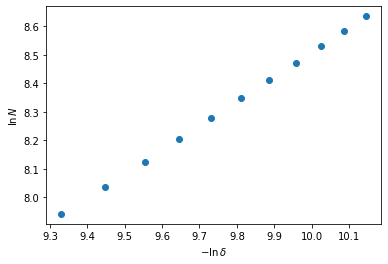

In [18]:
N_log = np.log(N_average)
minus_delta_log = N_log - np.log(M_average)
slope, intercept = np.polyfit(minus_delta_log, N_log, 1)
print(slope)
plt.plot(minus_delta_log, N_log, "o")
plt.xlabel(r"$-\ln\,\delta$")
plt.ylabel(r"$\ln\,N$")

In [ ]:
N_average

In [47]:
M_average

array([0.26970441, 0.25903935, 0.25478048, 0.25004955, 0.24567778,
       0.24172631])

In [48]:
index = None

In [52]:
index == None

True